# Aula 3 - Introdução à estatística inferencial e amostragem

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Amostragem

___
___
___

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 1) Introdução

Quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado.

Pra saber se uma sopa está corretamente salgada, experimentamos uma única colherada.

Quando um médico deseja identificar se um paciente está doente, alguns ml de sangue são retirados para análise. 

Em todos os casos acima, não seria conveniente analisar o todo, para chegar a uma conclusão satisfatória. De fato, o que fazemos é **tirar uma parte do todo** para validar alguma suposição.

Este procedimento é chamado de **amostragem**, e tem como objetivo **obter informações, tirar conclusões sobre o todo** com base na **análise de dados coletados de parte do todo (amostra)**.


**Quando utilizar uma amostra?**

**Populações infinitas** - O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

**Testes destrutivos** - Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

**Resultados rápidos** - Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

**Custos elevados** - Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.


A **inferência estatística** é a área que define:

- Como coletar as amostras do todo a serem analisadas;
- Como, e com que confiança, podemos generalizar as conclusões para o todo.


<img src="https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/mod10-big_picture_inference.gif" width="600">

#### 1.1) Definições

**População** ou **Universo**: é o conjunto de todas as unidades elementares de interesse: o todo. A população sempre deve ser definida claramente e em termos da informação que se pretende conhecer;

**Unidade**: trata-se de qualquer elemento da populaçao;

**Amostra**: uma parte ou subconjunto da população;

**Censo**: observação de todos os elementos da população;

**Parâmetro Populacional**: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser qualitativa (gosto musical, opnião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

**Função Paramétrica Populacional**: Alguma função de parâmetros populacionais.

**Estimadores pontuais**: são valores que **estimam** os parâmetros populacionais, calculados com base em uma amostra.
<br>

- Exemplos de parâmetros populacionais: 
    - média: $\mu$
    - diferença de médias: $\mu_1 - \mu_2$
    - proporção: $p$
    - diferença de proporções: $p1 - p2$
    
- Exemplos de estimadores de ponto: 
    - média: $\bar{x}$
    - diferença de médias: $\bar{x}_1 - \bar{x}_2$
    - proporção: $\hat{p}$
    - diferença de proporções: $\hat{p}_1 - \hat{p}_2$

**Exemplo 1**: Considere uma população formada por 4 alunos de uma escola. Com as seguintes caracteristicas:


<table>
    <th style="text-align: center; border: 1px solid black">Variável</th>
    <th style="text-align: center; border: 1px solid black" colspan="4">Valores</td>
    <tr style=" border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Aluno</td>
        <td style="text-align: center; border: 1px solid black">1</td>
        <td style="text-align: center; border: 1px solid black">2</td>
        <td style="text-align: center; border: 1px solid black">3</td>
        <td style="text-align: center; border: 1px solid black">4</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Nome</td>
        <td style="text-align: center; border: 1px solid black">Ana</td>
        <td style="text-align: center; border: 1px solid black">João</td>
        <td style="text-align: center; border: 1px solid black">Lucas</td>
        <td style="text-align: center; border: 1px solid black">Francisco</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Idade</td>
        <td style="text-align: center; border: 1px solid black">8</td>
        <td style="text-align: center; border: 1px solid black">7</td>
        <td style="text-align: center; border: 1px solid black">8</td>
        <td style="text-align: center; border: 1px solid black">12</td>
    </tr>
        <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Sexo</td>
        <td style="text-align: center; border: 1px solid black">F</td>
        <td style="text-align: center; border: 1px solid black">M</td>
        <td style="text-align: center; border: 1px solid black">M</td>
        <td style="text-align: center; border: 1px solid black">M</td>
    </tr>
</table>


Neste exemplo, cada aluno é um elemento da população. 

Com relação à amostragem os subconjuntos (Ana, João), (Francisco, Ana), (João) são **exemplos de amostra**. 

**Parâmetros populacionais**: idade = (8,7,8,12) e sexo = (F,M,M,M). 

Com relação às **funções paramétricas**, poderíamos definir:

- Idade média: fazendo idade = Y:

$$\mu = \overline{Y} = \frac{\sum_{i=1}^{4}Y_i}{4}=\frac{8+7+8+12}{4}=8,75$$

- Idade máxima: max(Y)= max(8,7,8,12) = 12

- Porporção de meninas: sexo = Y = (F,M,M,M)

$$p(F) = \frac{1}{4} = 0,25 $$


___
____
____

## 2) Amostragem

Veremos agora os principais conceitos e métodos da primeira etapa de todo estudo estatístico: a amostragem

_____________

### 2.1) Tipos de Amostragem

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental.

Aqui, abordaremos apenas os métodos relacionados à **amostragem probabilística**, com o objetico de obter uma **amostra representativa**. 

Uma amostra é considerada representativa quando consegue **refletir as caracteristicas da população**.

Vamos ver os principais **métodos de amostragem**:

____


### 2.2) Amostra Aleatória Simples

Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma Amostra Aleatória Simples com preposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.
 
Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

**Exemplo**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, **sem reposição**.

In [2]:
list(range(1, 21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [35]:
import random

# random.seed(42)

pop = list(range(1, 21))
print("População: ", pop, "\n")

amostra = random.sample(pop, 5)
print("Amostra: ", amostra)

População:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 

Amostra:  [14, 11, 9, 5, 7]


#### Com um dataset

In [11]:
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.shape

(244, 7)

In [36]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [49]:
df_sample = df.sample(n=20, replace=False, random_state=42)

In [50]:
df_sample

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


____

### 2.3) Amostra Estratificada

Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. 

São exemplos de estrato: gênero, faixa etária, região geográfica, profissão, etc. 

No geral, é usada quanto a população é heterogênea sob a ótica das características analisadas. 

Procedimento de amostragem:

- Dividir as $N$ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola). 

Agora considere que a proporção de cada estrato seja: 50% alunos, 25% professores e 25% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,5 \times n$ de alunos, $0,25\times n$ de professores e $0,25\times n$ de servidores.

<img src="https://faculty.elgin.edu/dkernler/statistics/ch01/images/strata-sample.gif" width=400>


In [51]:
tamanho_amostra = 50

print("Tamanho da amostra de professores:", 0.25*tamanho_amostra)
print("Tamanho da amostra de alunos:", 0.5*tamanho_amostra)
print("Tamanho da amostra de servidores:", 0.25*tamanho_amostra)

Tamanho da amostra de professores: 12.5
Tamanho da amostra de alunos: 25.0
Tamanho da amostra de servidores: 12.5


Voltando pro tips... A distribuição de "time" dos dados originais, é:

In [53]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
df_sample

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [52]:
df["time"].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

Já para a amostra aleatória que montamos, temos:

In [55]:
df_sample["time"].value_counts(normalize=True)

Dinner    0.6
Lunch     0.4
Name: time, dtype: float64

Como criar uma amostra com essa mesma proporção?

In [61]:
df.groupby('time').groups

{'Lunch': [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 220, 221, 222, 223, 224, 225, 226], 'Dinner': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, ...]}

In [65]:
df["time"].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [71]:
# dão o mesmo resultado!

# df.loc[df.groupby('time').groups["Lunch"]]

# df.groupby('time').get_group("Lunch")

In [79]:
# aux1 = df.loc[df.groupby('time').groups["Lunch"]].sample(int(20*0.3))

# jeito mais fácil de fazer a mesma coisa que acima
aux1 = df.loc[df["time"] == "Lunch"].sample(n = int(20*0.3), random_state=42)

aux2 = df.loc[df.groupby('time').groups["Dinner"]].sample(n = int(20*0.7), random_state=42)

df_sample_strat_dificil = pd.concat([aux1, aux2])

# vendo as proporções
df_sample_strat_dificil["time"].value_counts(normalize=True)

Dinner    0.7
Lunch     0.3
Name: time, dtype: float64

In [99]:
df["time"].value_counts()*(20/df.shape[0])

Dinner    14.42623
Lunch      5.57377
Name: time, dtype: float64

In [81]:
# o mesmo que acima, mas usando o "frac", que é fixado, como sendo a "fração" que equivale a n=20

aux1 = df.loc[df["time"] == "Lunch"].sample(frac = 20/df.shape[0], random_state=42)

aux2 = df.loc[df.groupby('time').groups["Dinner"]].sample(frac = 20/df.shape[0], random_state=42)

df_sample_strat_dificil = pd.concat([aux1, aux2])

# vendo as proporções
df_sample_strat_dificil["time"].value_counts(normalize=True)

Dinner    0.7
Lunch     0.3
Name: time, dtype: float64

In [92]:
N = df.shape[0]
n = 20

In [94]:
(n/N)*100

8.19672131147541

In [100]:
df.sample(frac=n/N, random_state=42)

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [101]:
df.sample(n=n, random_state=42)

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [88]:
n = 20
frac = n/df.shape[0]

df_sample_strat = df.groupby('time').apply(lambda x: x.sample(frac=frac, random_state=42))

df_sample_strat["time"].value_counts(normalize=True)

Dinner    0.7
Lunch     0.3
Name: time, dtype: float64

____

### 2.4) Amostra Sistemática

Usada quando os elementos população estão ordenados (ex.: população de lista telefônica, casas em uma rua, etc.) 

Considere uma população de tamanho $N$ e que se queira uma amostra de tamanho $n$. 

O processo de amostragem deste método consiste em:

- Dividir o tamanho populacional em $k$ partes, tal que:

$$ k = \frac{N}{n} $$

- Definir a posição de início da amostragem (que também será o primeiro elemento da amostra). Para tal fim, é sorteado $i$ com o uso da amostra aleatória simples no intervalo, em que  $i \in [0, k-1]$


- A partir do elemento selecionado aleatoriamente, é realizada sucessão aritimética para selecionar os $n-1$ indivíduos restantes
$$i, i + k, i + 2k, i + 3k, ...., i + (n-1)k$$



Exemplo de algoritmo para amostragem sistemática:

In [108]:
def amostra_sistematica(populacao, n):
    
    N = len(populacao)
    
    k = N // n
    
    primeiro_elemento = np.random.randint(0, k)
    
    print("N={}; n={}; k={}".format(N, n, k))
    print("i={}".format(primeiro_elemento))
    
    amostras = []
    
    for i in range(primeiro_elemento, N, k):
        
        amostras.append(populacao[i])
    
    return amostras

In [109]:
pop

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [114]:
amostra_sistematica(pop, 5)

N=20; n=5; k=4
i=1


[2, 6, 10, 14, 18]

____

### 2.5) Amostra por conglomerados (clusters)

A população é dividida em subpopulações (conglomerados ou clusters) heterogêneas distintas (quarteirões, residências, famílias, bairros, etc.). 

Alguns dos conglomerados são selecionados segundo amostra aleatória simples e **todos os elementos** nos conglomerados selecionados são observados. 

Note que amostragem é feita sobre os conglomerados, e não mais sobre os indivíduos da população. 

Este procedimento amostral é adequado quando é possível dividir a população em um grande número de pequenas subpopulações.

Geralmente este método é usado quando os sistemas de referência da população não são adequados e o custo para atualização é alto, ou quando identificar os elementos da população em campo é cara e consome muito tempo.

**Exemplo 4**: Suponha que o objetivo de uma pesquisa seja determinar a renda média familiar de moradores de uma cidade. Dificilmente dispõe-se de uma lista de famílias, a unidade elementar da população de interesse. Pode-se usar como sistema de referência a lista de setores censitários do IBGE. Neste caso, os setores censitários seriam os conglomerados.

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/5e67c2e2-4b69-494c-aa8a-e856ab0e8442.png>

### 2.6) Tamanho Amostral

Ao extrair uma amostra para inferir algo sobre a população, sempre há um erro associado ao **planejamento amostral**. 

A medida que o **tamanho da amostra aumenta**, o **erro do estimador diminui** (vide o TCL!). 

Vale ressaltar que uma amostra muito grande pode implicar em custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva. 

Deste modo, o ponto chave de um levantamento amostral é determinar **o tamanho adequado da amostra** para que **os estimadores pontuais** sejam **estimados com confiança**!

Ou seja, queremos responder à pergunta:

> O quão confiantes estamos com relação aos estimadores pontuais que calcularmos com base em uma amostra?

Ou seja,

- A partir de $\bar{x}$, o que eu posso **inferir** sobre $\mu$?

- Ou, a partir de $\hat{p}$, o que eu posso **inferir** sobre $p$?

Para responder a estas perguntas, vamos introduzir uma das ideias mais poderosas da estatística: o **teorema central do limite**

**Exemplo 5**: Considere o exemplo em que se queira estimar a média da variável "Petal length" (base ires). O gráfico mostra que a relação entre tamanho da amostra e erro amostral não é linear, corroborando o que será discutido nesta seção.

In [115]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
df.shape

(150, 5)

Suponha que a base seja a população (não é verdade! A base em si já é uma amostra...)

In [149]:
media_populacional = df['petal_length'].mean()

media_populacional

3.7580000000000027

In [147]:
df["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Vamos criar várias sub-amostras, pra calcularmos a média!

In [155]:
dados = {"n" : [],
         "media_amostral" : []}

for i in range(1, df.shape[0]+1):
    
    ma = df["petal_length"].sample(n=i, replace=False).mean()
    
    dados["n"].append(i)
    dados["media_amostral"].append(ma)
    
df2 = pd.DataFrame(dados)

df2

,n,media_amostral
0,1,1.400000
1,2,4.300000
2,3,5.166667
3,4,2.550000
4,5,3.800000
...,...,...
145,146,3.757534
146,147,3.779592
147,148,3.747297
148,149,3.773826


Agora vamos ver o quanto que as médias amostrais estão diferentes da média populacional...

In [156]:
df2["media_populacional"] = media_populacional

df2["delta"] = df2["media_amostral"] - media_populacional

In [157]:
df2

,n,media_amostral,media_populacional,delta
0,1,1.400000,3.758,-2.358000e+00
1,2,4.300000,3.758,5.420000e-01
2,3,5.166667,3.758,1.408667e+00
3,4,2.550000,3.758,-1.208000e+00
4,5,3.800000,3.758,4.200000e-02
...,...,...,...,...
145,146,3.757534,3.758,-4.657534e-04
146,147,3.779592,3.758,2.159184e-02
147,148,3.747297,3.758,-1.070270e-02
148,149,3.773826,3.758,1.582550e-02


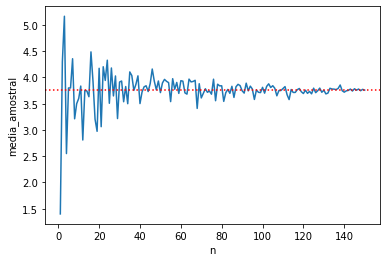

In [162]:
sns.lineplot(data=df2, x="n", y="media_amostral")

plt.axhline(y=media_populacional, color="red", ls=":")

plt.show()

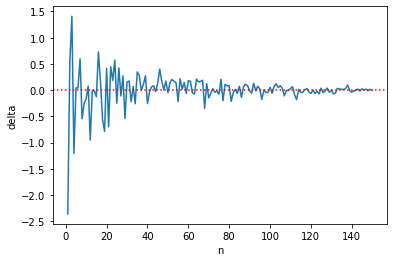

In [160]:
sns.lineplot(data=df2, x="n", y="delta")

plt.axhline(y=0, color="red", ls=":")

plt.show()

Este exemplo emula o que acontece na vida real (e um fato bem intuitivo): quanto maior a amostra, menor será o erro cometido pelo estimador pontual.

Mas, para podermos ir além nesta questão, vamos precisar, antes de qualquer coisa, falar sobre o TCL. Faremos isso na próxima aula!

____
____
____

# ALGUMAS REFERÊNCIAS BOAS:

- https://www.openintro.org/book/stat/ - Alguns livros muuuito bons, da Universidade de Duke & outras. Recomendo o "Intro Statistics with Randomization and Simulation". Dá pra baixar grátis no site :)
- https://www.google.com.br/books/edition/ESTAT%C3%8DSTICA_B%C3%81SICA/vDhnDwAAQBAJ?hl=pt-BR&gbpv=1&dq=estatistica+basica+bussab&printsec=frontcover - livro em português, muito bom também para uma exposição teórica um pouco mais densa! Valeu Victor pela recomendação!